# Analysis

### Setup

In [1]:
# Imports
import json
import os
import sys
import pandas as pd
import numpy as np
import mdtraj as md
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

sys.path.append('./src')
try:
    import analyse_data
    import analyse_results
except ImportError: pass # Due to uninstalled simtk/openmm

## Initial test runs

In [17]:
# Loading metadata
initial = analyse_data.load_metadata('exp/initial/initial.json')

initial

,template,sequence,location,region,variant,uniprot_id,description,species,name
H1-0_WT,H1-0,TKGVGASGSFRLAKSDEPKKSVAFKKTKKEIKKVATPKKASKPKKA...,83:194,CTD,Wild type,NaN,NaN,NaN,NaN
H1-0_RAND,H1-0,PGTKKPKSTKTKKALAKAKKAKVKGSKAEKATSAAKKSVKPKKSKA...,83:194,CTD,Randomly shuffled,NaN,NaN,NaN,NaN
H1-0_CLUST,H1-0,KKKKKKKKKKRKKKKKKKKKKKKKKKKKKKKKRKKKKKKKKKKKKA...,83:194,CTD,Terminally clustered charges,NaN,NaN,NaN,NaN
H2B_WT,H2B,MPDPAKSAPAPKKGSKKAVTKVQKKDGKKRKRSRK,0:36,NTD,Wild type,NaN,NaN,NaN,NaN
H2B_RAND,H2B,EKKKKSDMKPKRKPVASQAAKPKSRKKKTPGRGAA,0:36,NTD,Randomly shuffled,NaN,NaN,NaN,NaN
H2B_CLUST,H2B,RKRKKKKKKKRKKKKASAVTAAQGPPGSAPPMSED,0:36,NTD,Terminally clustered charges,NaN,NaN,NaN,NaN


### CIDER parameters for input data

More on CIDER from Pappu Lab:
- [CIDER](http://pappulab.wustl.edu/CIDER/about/)
- [localCIDER](http://pappulab.github.io/localCIDER/)

In [13]:
# Calculating parameters
params = analyse_data.cider_parameters(initial['sequence'])

# Presenting documentation and results
params.sort_values(by='kappa')

,kappa,FCR,NCPR,Hydrophobicity,Frac. dis. prom.
H1-0_WT,0.154432,0.432432,0.378378,3.249550,0.891892
H1-0_RAND,0.217323,0.432432,0.378378,3.249550,0.891892
H2B_RAND,0.299729,0.485714,0.371429,2.614286,0.942857
H2B_WT,0.301676,0.485714,0.371429,2.682857,0.914286
H2B_CLUST,0.965685,0.485714,0.371429,2.614286,0.942857
H1-0_CLUST,0.994959,0.432432,0.378378,3.249550,0.891892


### $R_g$-distribution of variants

In [14]:
# Loading trajectories
initial['traj'] = initial.apply(lambda row: md.load_dcd(*['/'.join(['exp/initial/results', row.name, filename]) for filename  in ['traj.dcd', 'top.pdb']]), axis=1)

# Calculating Rg
initial['Rg'] = initial.apply(lambda row: analyse_results.calculate_rg(row['sequence'], row['traj']), axis=1)

MEAN VALUES OF Rg
template  variant                     
H1-0      Randomly shuffled               0.009362
          Terminally clustered charges    0.006794
          Wild type                       0.009554
H2B       Randomly shuffled               0.004160
          Terminally clustered charges    0.003133
          Wild type                       0.004261
Name: Rg, dtype: float64


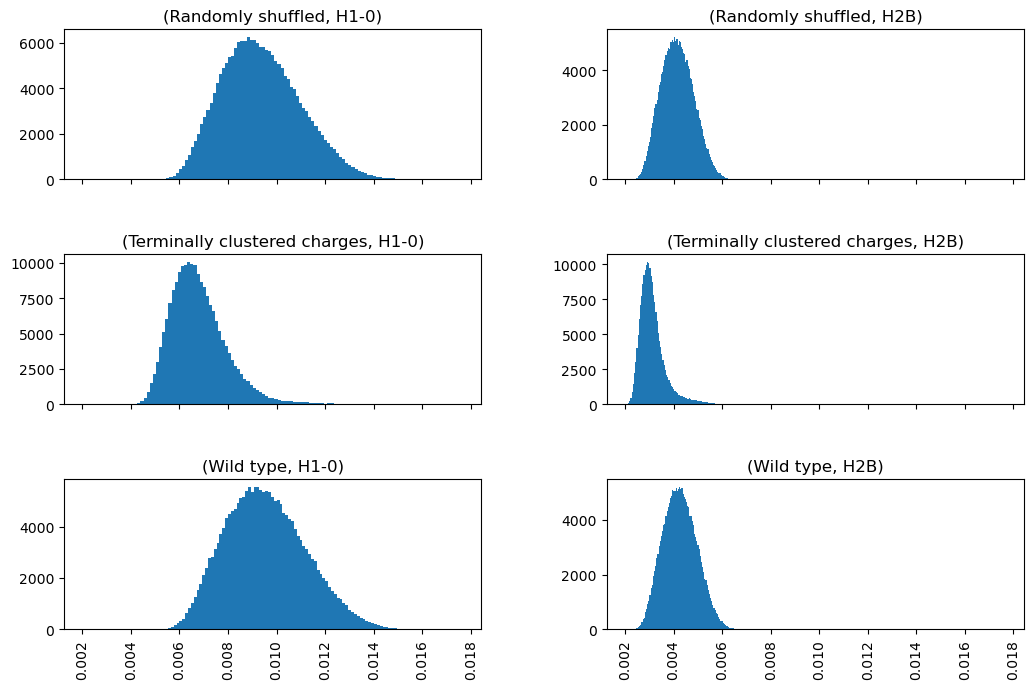

In [15]:
# Plotting Rg distributions
initial_rg = initial_rg.explode('Rg')
initial_rg['Rg'] = initial_rg['Rg'].astype(float)

# Plotting distributions
initial_rg.hist(column='Rg', by=['variant', 'template'], layout=(3,2), sharex=True, figsize=(12,8), bins=100)

# Calculating means
print("MEAN VALUES OF Rg")
print(initial_rg.groupby(by=['template', 'variant'])['Rg'].mean())

## Histone H1.0 Orthologs

In [59]:
# Loading metadata
ortho = analyse_data.load_metadata('exp/ortho_h1-0/ortho_h1-0.json')

ortho

,template,sequence,location,region,variant,description,species,name,uniprot_id
0_9TELE,0_9TELE,HTKGIGASGSFRLTKPEDSSKKPAKAAAAVAAKPKKVAKAKPKKAA...,80:197,CTD,Wild type,histone H1.0-B,Austrofundulus limnaeus,A0A2I4B7C3_9TELE,A0A2I4B7C3
1_CYPVA,1_CYPVA,RHTKGIGASGSFRLTKPEDTKKPAAKAASAPKPKKVVKPKPKKAAK...,78:194,CTD,Wild type,Histone H1.0-B,Cyprinodon variegatus (Sheepshead minnow),A0A3Q2C803_CYPVA,A0A3Q2C803
2_FUNHE,2_FUNHE,RHTKGIGASGSFRLTKPEDTKKTPAKAASAAKPRKVAKPKPKKAAK...,79:195,CTD,Wild type,Histone H1.0-B,Fundulus heteroclitus (Killifish),A0A3Q2Q6G9_FUNHE,A0A3Q2Q6G9
3_KRYMA,3_KRYMA,HTKGIGASGSFRLTKPEDSSKKPAKAAAAAASAKPKKVAKPKPKKA...,80:198,CTD,Wild type,Histone H1.0-B,Kryptolebias marmoratus (Mangrove killifish),A0A3Q3AJ14_KRYMA,A0A3Q3AJ14
4_NOTFU,4_NOTFU,RHTKGIGASGSFRLTKPEDSKKPAKAAASAKPKKVAKPKPKKAAKP...,79:194,CTD,Wild type,"H1 histone family, member 0",Nothobranchius furzeri (Turquoise killifish),A0A1A8V9N7_NOTFU,A0A1A8V9N7
...,...,...,...,...,...,...,...,...,...
191_NECAM,191_NECAM,RKEVVRKEAAQKAKPTRNTTGSSSRKTVKSVKKSTASRV,168:207,CTD,Wild type,Linker histone H1 and H5 family protein,Necator americanus (Human hookworm),W2TEX0_NECAM,W2TEX0
192_STRRB,192_STRRB,KKSSEAKKVTDSKKSTDVKKTPETKKAVKAPKAKATEKKVLKKAIV...,138:221,CTD,Wild type,Histone H1.0,Strongyloides ratti (Parasitic roundworm),A0A090KXU4_STRRB,A0A090KXU4
193_CAPO3,193_CAPO3,AAALPKAAKAPKAAKAPKAEKPAKAAKAPKADKPAKAAKAPKAAKA...,213:355,CTD,Wild type,H15 domain-containing protein,Capsaspora owczarzaki (strain ATCC 30864),A0A0D2VKG3_CAPO3,A0A0D2VKG3
194_STRPU,194_STRPU,RHVKGSGASGSFLLAEKTKTPKKAAAKKATPKKKPAAKKTKKPAAK...,89:185,CTD,Wild type,Histone H1-delta,Strongylocentrotus purpuratus (Purple sea urchin),H1D_STRPU,P15870


### CIDER parameters for input data

More on CIDER from Pappu Lab:
- [CIDER](http://pappulab.wustl.edu/CIDER/about/)
- [localCIDER](http://pappulab.github.io/localCIDER/)

In [61]:
# Calculating parameters
params = analyse_data.cider_parameters(ortho['sequence'])

# Adding length
params['Length'] = ortho['sequence'].str.len()

# Presenting documentation and results
params.sort_values(by='kappa')

,kappa,FCR,NCPR,Hydrophobicity,Frac. dis. prom.,Length
175_ECTSI,0.065010,0.469880,0.445783,3.153012,0.879518,83
179_POMCA,0.073321,0.397959,0.397959,3.468367,0.969388,98
180_POMCA,0.091011,0.378641,0.378641,3.589320,0.951456,103
193_CAPO3,0.091084,0.394366,0.253521,3.490141,0.978873,142
34_ONCMY,0.098636,0.461538,0.423077,3.390385,0.884615,104
...,...,...,...,...,...,...
188_LOALO,0.184397,0.474576,0.338983,2.750847,0.881356,59
184_POCDA,0.192282,0.527174,0.201087,2.597826,0.869565,184
135_OCTDE,0.199832,0.393617,0.287234,3.159574,0.861702,94
182_ACTTE,0.203189,0.518519,0.481481,2.600000,0.962963,108


In [62]:
# Joining parameter results to metadata
ortho = ortho[list(set(ortho.columns) - set(params.columns))]
ortho = ortho.join(params)

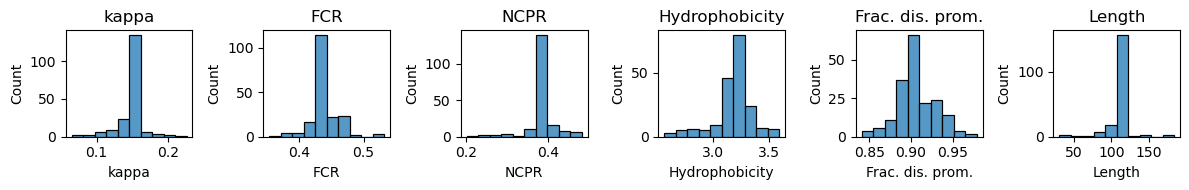

In [63]:
# Plotting CIDER parameters distribution
fig, axes = plt.subplots(ncols=len(params.columns), figsize=(12,2))

# Looping over subplots and parameters
for ax, col in zip(axes, params.columns):
    sns.histplot(data=params, x=col, bins=10, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

### Amino acid content for input data

In [64]:
# Calculating frequencies
freqs = analyse_data.amino_acid_content(ortho['sequence'])

In [65]:
# Joining frequency results to metadata
ortho = ortho[list(set(ortho.columns) - set(freqs.columns))]
ortho = ortho.join(freqs)

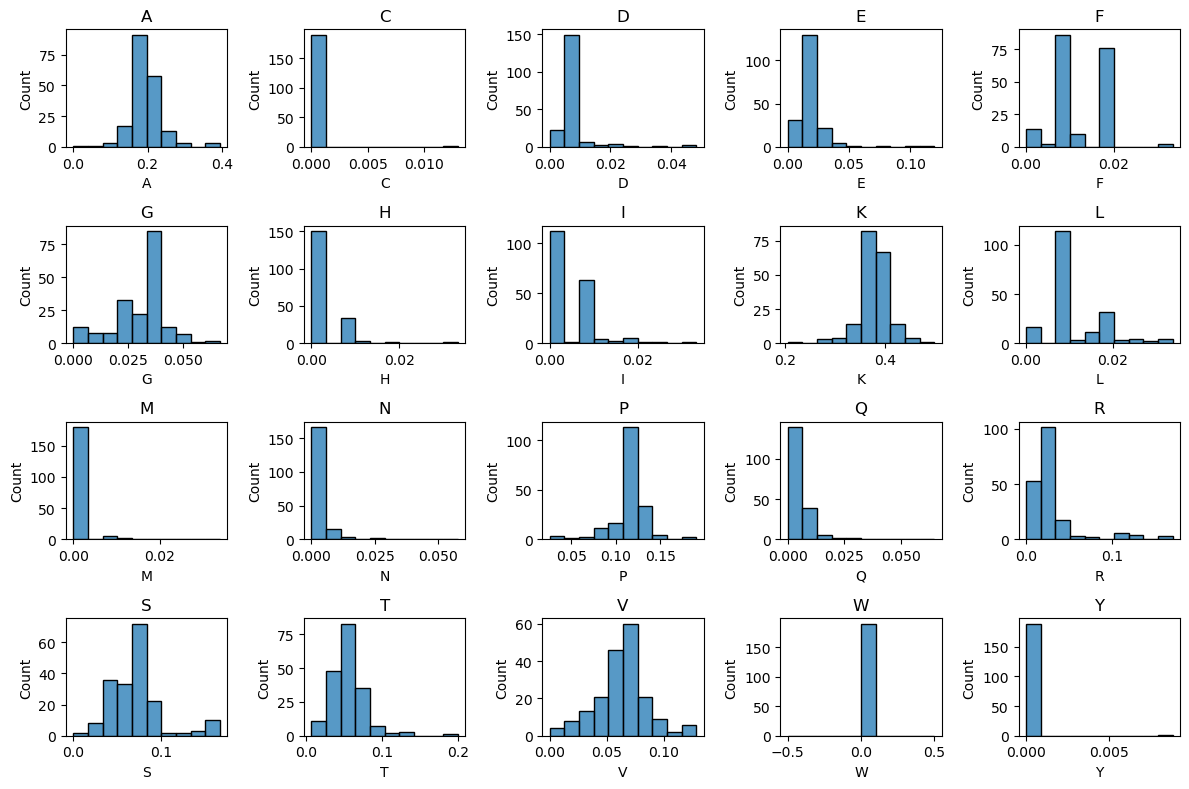

In [66]:
# Plotting distributions
# Setting plot dimensions
dimensions = (4,5)
fig, axes = plt.subplots(*dimensions, figsize=(12,8))
amino_acids = np.reshape(analyse_data.amino_acids, dimensions)

# Looping over subplots and amino acids
for i in range(dimensions[0]):
    for j in range(dimensions[1]):
        ax = axes[i,j]
        aa = amino_acids[i,j]
        sns.histplot(data=freqs, x=aa, bins=10, ax=ax)
        ax.set_title(aa)

plt.tight_layout()
plt.show()

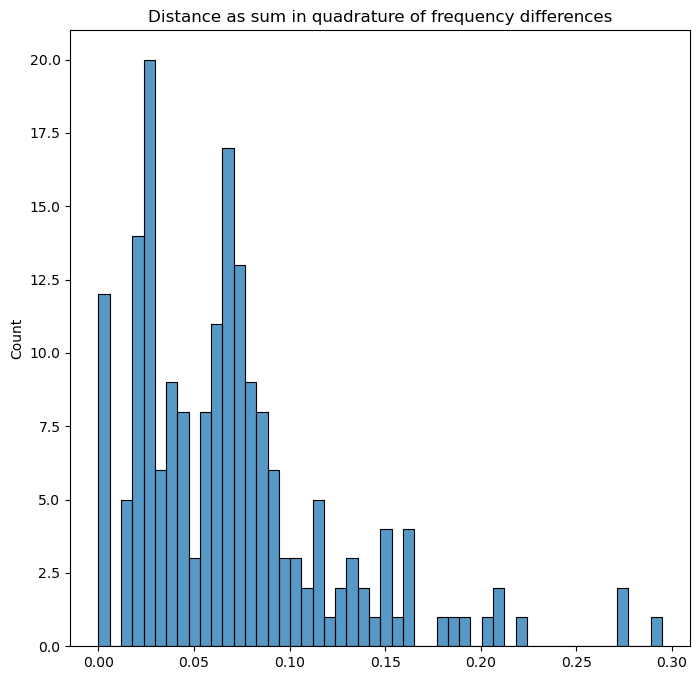

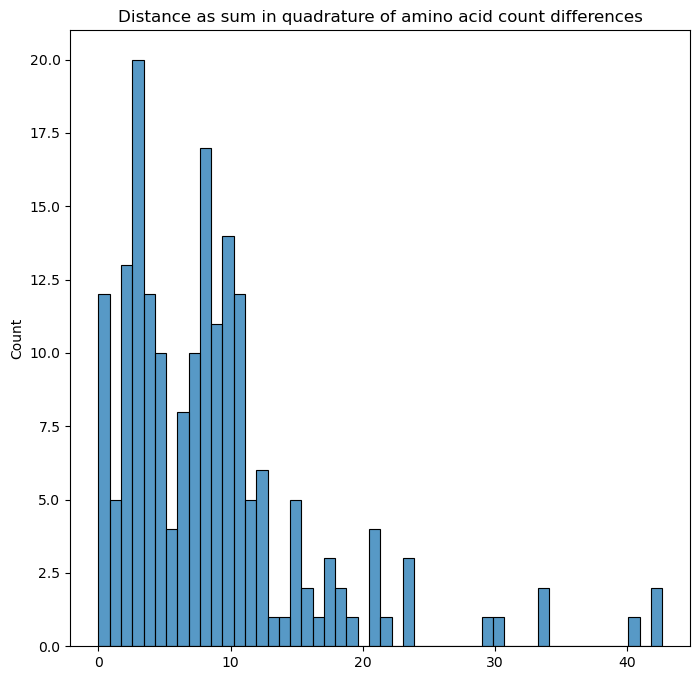

In [67]:
# Calculating sequence distance
# Setting reference sequence
i_ref = ortho[ortho['species'].str.contains('Human')].index[0]

# Method 1: Distance as sum in quadrature of frequency differences
freq_diff = (freqs - freqs.loc[i_ref])**2
freq_diff = np.sqrt(freq_diff.sum(axis=1))
sns.histplot(x=freq_diff, bins=50)
plt.title("Distance as sum in quadrature of frequency differences")
plt.show()

# Method 2: Distance as sum in quadrature of amino acid count differences
counts = freqs.transpose() * ortho['sequence'].str.len()
counts = counts.transpose()
count_diff = (counts - counts.loc[i_ref])**2
count_diff = np.sqrt(count_diff.sum(axis=1))
sns.histplot(x=count_diff, bins=50)
plt.title("Distance as sum in quadrature of amino acid count differences")
plt.show()

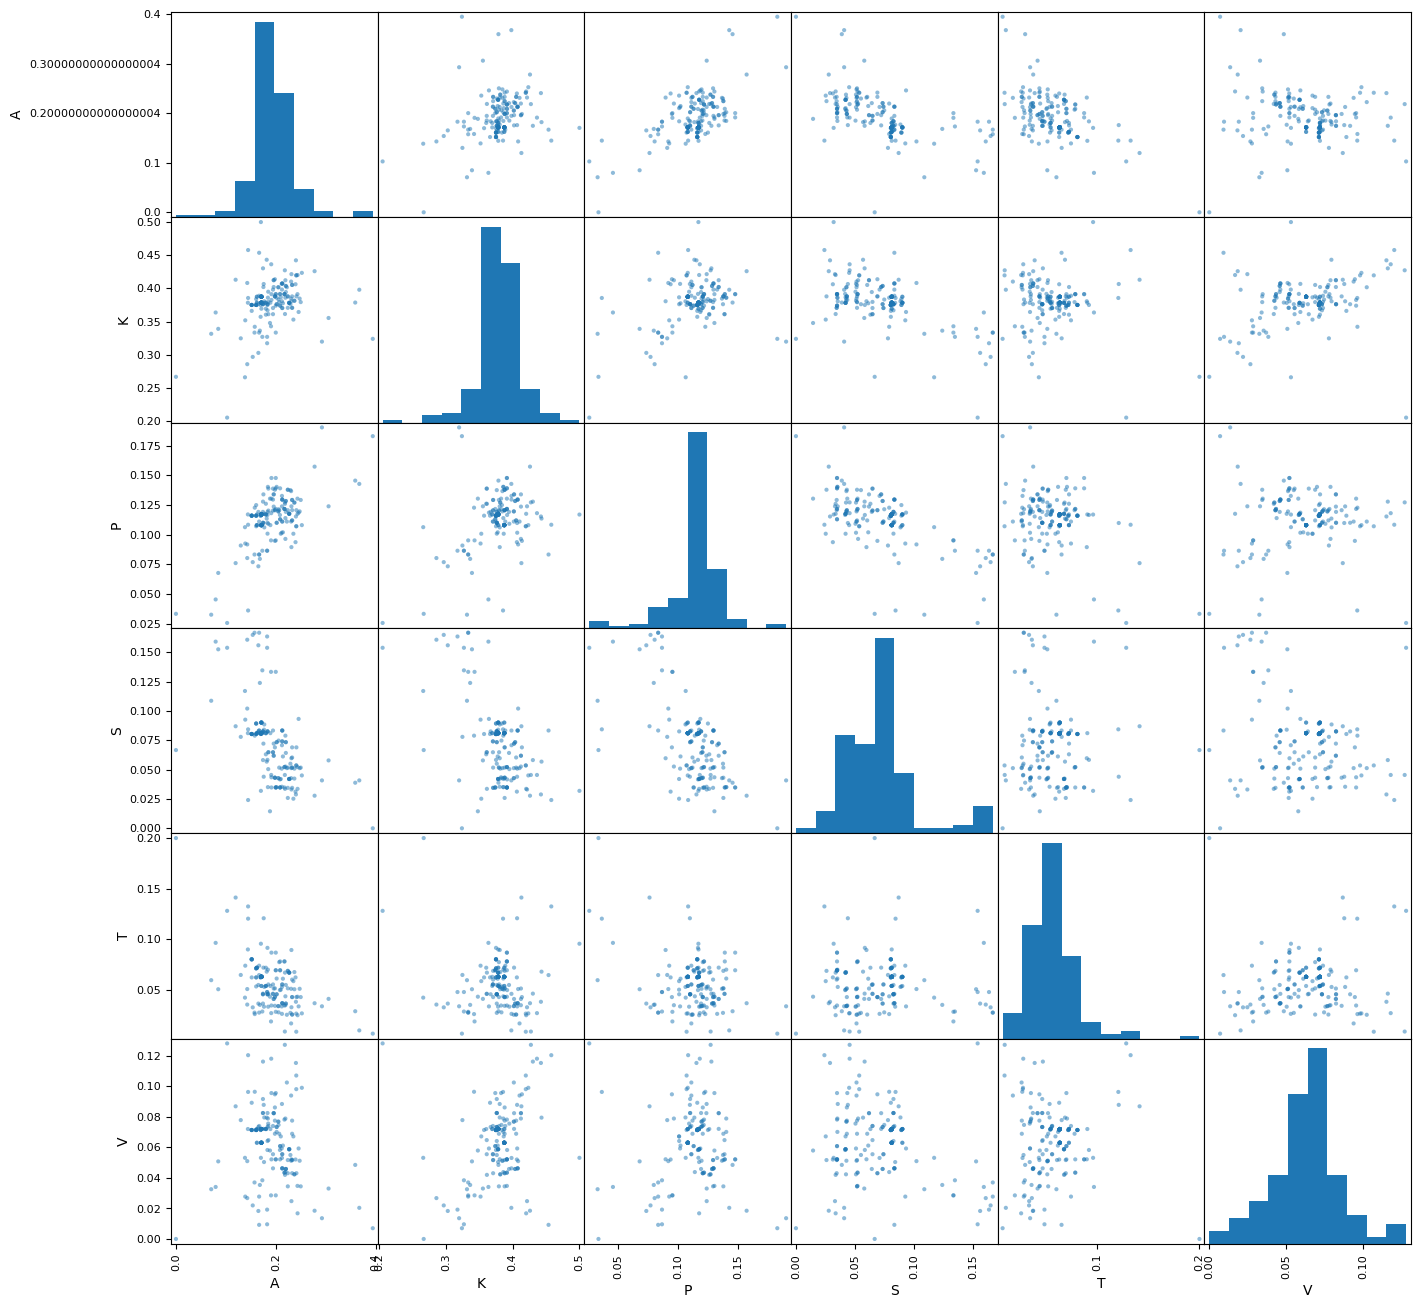

In [68]:
# Plotting a scatter matrix for most common residue types
_ = pd.plotting.scatter_matrix(freqs.loc[:, freqs.mean() > 1/20], figsize=(16, 16))

### Principal component analysis

In [69]:
# Performing PCA
# Standardising data
features = ortho[analyse_data.amino_acids]
features = (features - features.mean()) / features.std()
features.fillna(0, inplace=True)

# Perform PCA
pca = PCA()

# Calculate principal components
pca_pcs = pd.DataFrame(pca.fit_transform(features), columns=[f'PC{i+1}' for i in range(len(features.columns))], index=features.index)

In [70]:
# Joining principal components to metadata
ortho = ortho[list(set(ortho.columns) - set(pca_pcs.columns))]
ortho = ortho.join(pca_pcs)

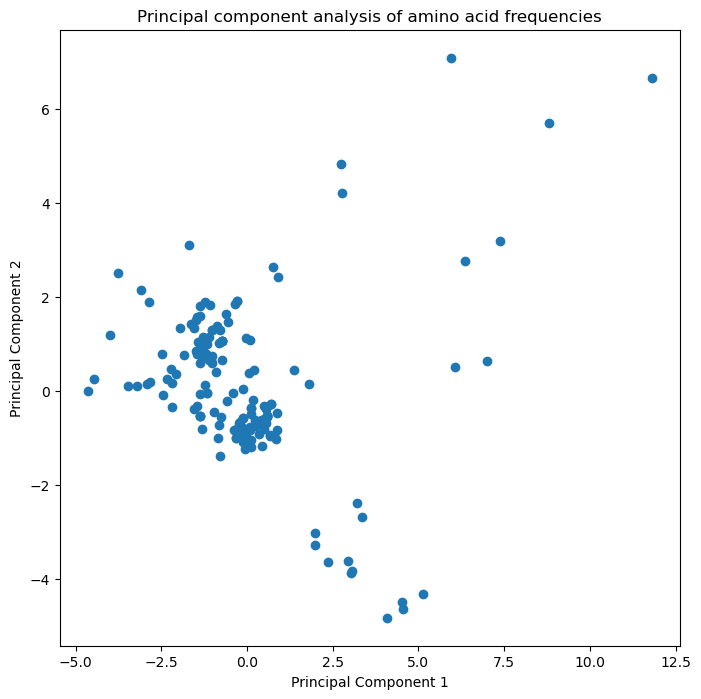

In [71]:
# Plot the first two principal components
plt.scatter(pca_pcs['PC1'], pca_pcs['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Principal component analysis of amino acid frequencies")
plt.show()

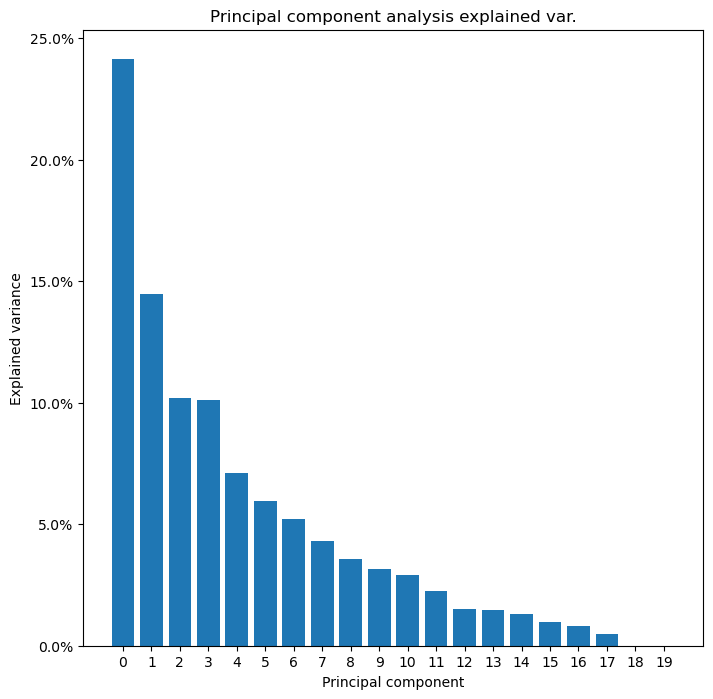

In [89]:
# Plot the explained variance
plt.bar(range(len(features.columns)), pca.explained_variance_ratio_)
plt.xticks(range(len(features.columns)))
plt.xlabel('Principal component')
plt.ylabel('Explained variance')
plt.title('Principal component analysis explained var.')
import matplotlib.ticker as mtick
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plt.show()

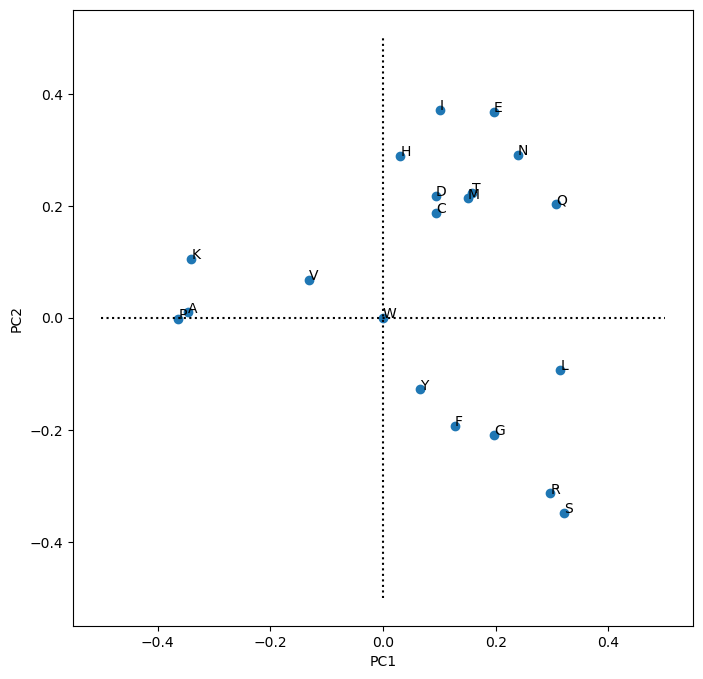

In [73]:
# Plotting rotational matrix for first two PCs
rotation_matrix = pca.components_.T
fig, ax = plt.subplots()
ax.scatter(rotation_matrix[:,0], rotation_matrix[:,1])
for i, feature_name in enumerate(features.columns):
    ax.annotate(feature_name, (rotation_matrix[i,0], rotation_matrix[i,1]))
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.hlines(0,-0.5, 0.5, 'k', 'dotted')
ax.vlines(0,-0.5, 0.5, 'k', 'dotted')
plt.show()

### Clustering

#### Fitting

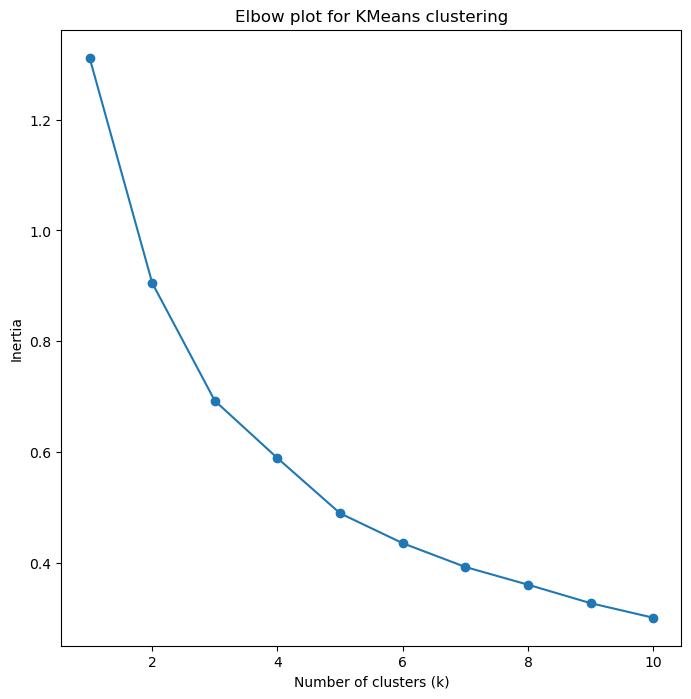

In [74]:
# Elbowplot for KMeans clustering
# Load the data
features = ortho[analyse_data.amino_acids]

# Initialising an empty list to store the inertia values for different k values
inertia = []

# Defining a range of k values to test
k_values = range(1, 11)

# Performing KMeans clustering for each k value and storing the inertia value
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=50)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plotting the elbow plot
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow plot for KMeans clustering')
plt.show()

In [75]:
# Setting k-value
k = 2

Sequences in clusters
0    172
1     18
Name: cluster, dtype: int64


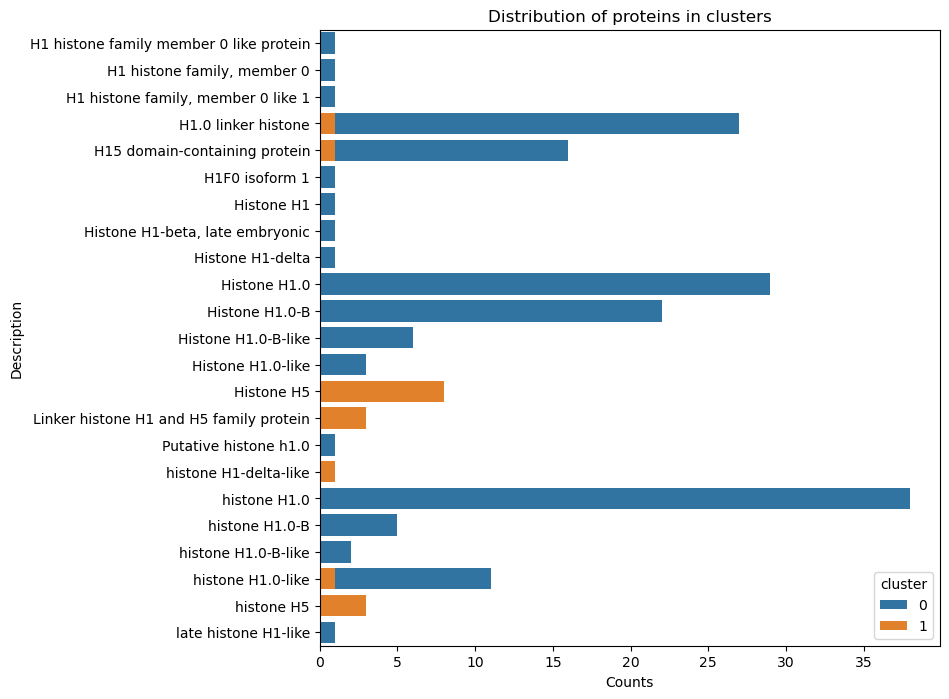

In [76]:
# Assigning labels from clustering
# Load the data
features = ortho[analyse_data.amino_acids]

# Clustering
kmeans = KMeans(n_clusters=k, n_init=50)
kmeans.fit(features)

# Assigning labels
ortho['cluster'] = kmeans.predict(features)
print("Sequences in clusters")
print(ortho['cluster'].value_counts())

# Plotting protein assignment to clusters
sns.barplot(data=ortho.groupby(['description', 'cluster'])['variant'].count().reset_index(), x='variant', y='description', hue='cluster', dodge=False, orient='h')
plt.xlabel("Counts")
plt.ylabel("Description")
plt.title("Distribution of proteins in clusters")
plt.show()

#### Amino acid composition by cluster

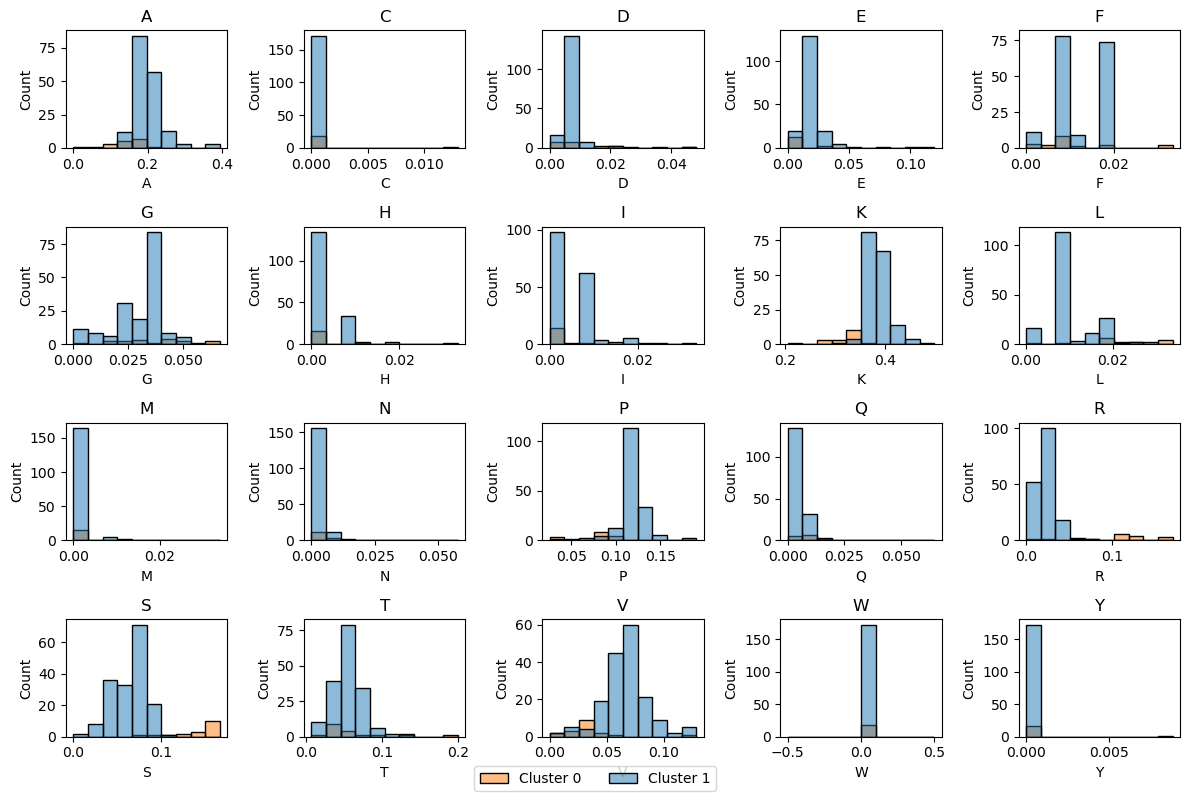

In [77]:
# Plotting amino acids distribution with clusterings
# Setting plot dimensions
dimensions = (4,5)
fig, axes = plt.subplots(*dimensions, figsize=(12,8))
amino_acids = np.reshape(analyse_data.amino_acids, dimensions)

# Looping over subplots and amino acids
for i in range(dimensions[0]):
    for j in range(dimensions[1]):
        ax = axes[i,j]
        aa = amino_acids[i,j]
        sns.histplot(data=ortho, x=aa, hue='cluster', bins=10, ax=ax) #, multiple='stack')
        ax.set_title(aa)
        ax.get_legend().remove() # remove legend from individual subplots
    
# Add a common legend outside the subplots
fig.legend([f'Cluster {ki}' for ki in range(k)], ncols=k, loc='lower center')

plt.tight_layout()
plt.show()

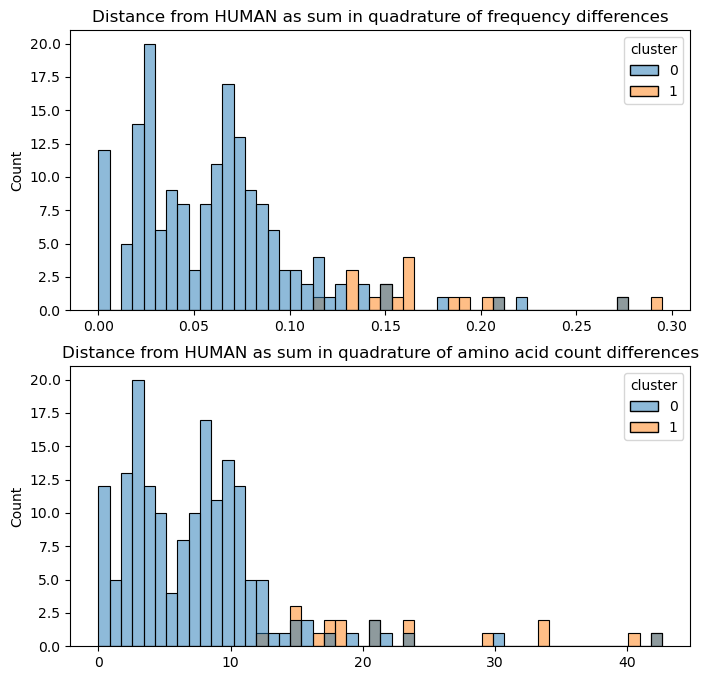

In [78]:
# Plotting sequence distance by cluster

# Method 1: Distance as sum in quadrature of frequency differences
plt.subplot(211)
sns.histplot(x=freq_diff, hue=ortho['cluster'], bins=50) #, multiple='stack')
plt.title("Distance from HUMAN as sum in quadrature of frequency differences")

# Method 2: Distance as sum in quadrature of amino acid count differences
plt.subplot(212)
sns.histplot(x=count_diff, hue=ortho['cluster'], bins=50) #, multiple='stack')
plt.title("Distance from HUMAN as sum in quadrature of amino acid count differences")

plt.rcParams["figure.figsize"] = (8,8)
plt.show()

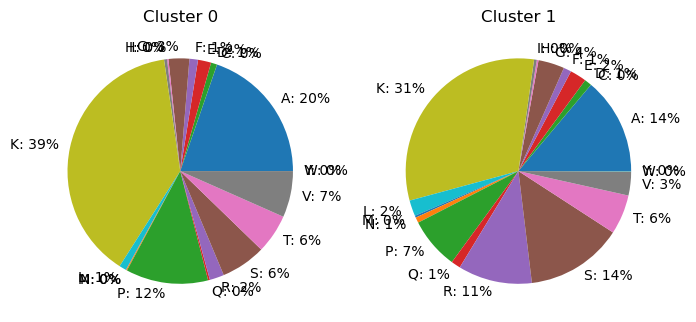

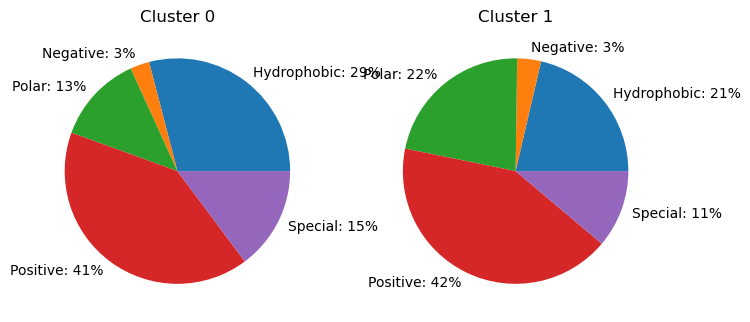

In [79]:
# Plotting relative amino acid contents in pie chart by cluster
ortho_pie = ortho.groupby('cluster')[analyse_data.amino_acids].mean().transpose()

# Plotting by residue
fig, axes = plt.subplots(1, len(ortho_pie.columns))
for ax, cluster in zip(axes, ortho_pie.columns):
    ax.set_title(f'Cluster {cluster}')
    ax.pie(ortho_pie[cluster], labels=[f'{i}: {v:.0%}' for i, v in zip(ortho_pie.index, ortho_pie[cluster])])
plt.show()

# Plotting by type
ortho_pie['type'] = ortho_pie.index.map(analyse_data.amino_acid_types)
ortho_pie = ortho_pie.groupby('type').sum()
fig, axes = plt.subplots(1, len(ortho_pie.columns))
for ax, cluster in zip(axes, ortho_pie.columns):
    ax.set_title(f'Cluster {cluster}')
    ax.pie(ortho_pie[cluster], labels=[f'{i}: {v:.0%}' for i, v in zip(ortho_pie.index, ortho_pie[cluster])])
plt.show()

#### CIDER parameters by cluster

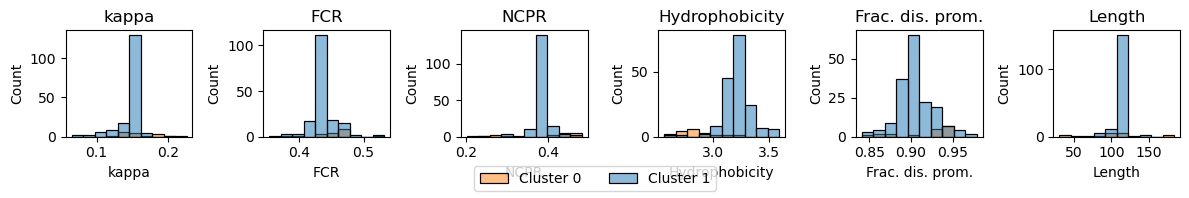

In [80]:
# Plotting CIDER parameters distribution with clusterings
# Joining parameters (previously calculated)
param_cols = params.columns

# Setting plot dimensions
fig, axes = plt.subplots(ncols=len(param_cols), figsize=(12,2))

# Looping over subplots and parameters
for ax, col in zip(axes, param_cols):
    sns.histplot(data=ortho, x=col, hue='cluster', bins=10, ax=ax)#, multiple='stack')
    ax.set_title(col)
    ax.get_legend().remove() # remove legend from individual subplots
    
# Add a common legend outside the subplots
fig.legend([f'Cluster {ki}' for ki in range(k)], ncols=k, loc='lower center')

plt.tight_layout()
plt.show()

#### PCA by cluster

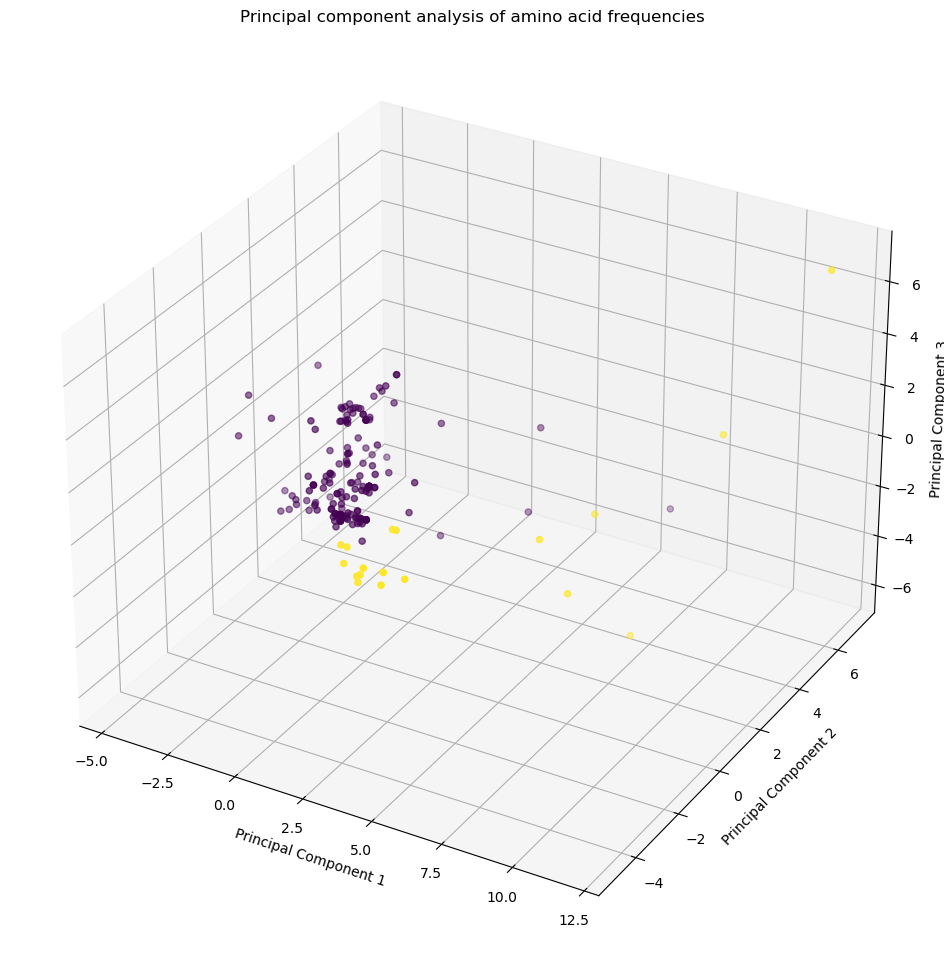

In [81]:
# Plotting PCA with clustering
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(ortho['PC1'], ortho['PC2'], ortho['PC3'], c=ortho['cluster'])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title("Principal component analysis of amino acid frequencies")
plt.show()